# Building a Classification Decision Tree

In [62]:
import pandas as pd

In [63]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_classification.csv"


df = pd.read_csv(df_path)


culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]


target_col = "Species"

In [64]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split


data, target = df[culmen_columns], df[target_col]


data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    random_state=123,
                                                                   stratify=target
                                                                   )



In [65]:
from sklearn.linear_model import LogisticRegression

lin_model = LogisticRegression()

lin_model.fit(data_train, target_train)

LogisticRegression()

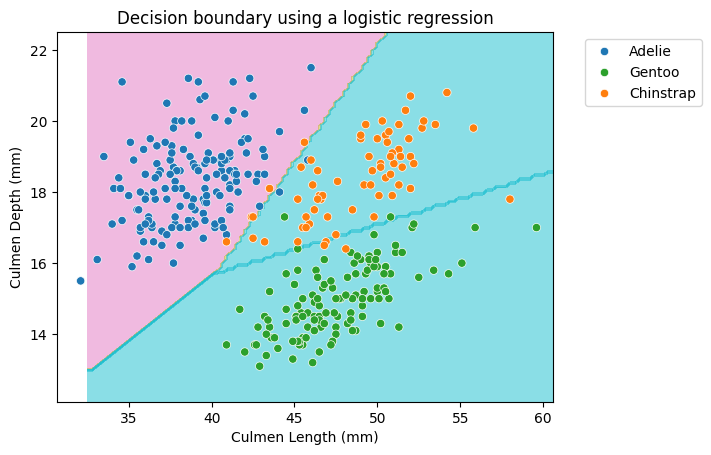

In [66]:
# Plotting th decision Boundary
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.inspection import DecisionBoundaryDisplay


tab10_norm = mpl.colors.Normalize(vmin= -0.5, vmax=0.5)

# Color Palette
palette = ["tab:blue", "tab:green", "tab:orange"]


dbd = DecisionBoundaryDisplay.from_estimator(
                    lin_model,
                    data_train,
                    response_method="predict",
                    cmap="tab10",
                    norm=tab10_norm,
                    alpha=0.5
)


sns.scatterplot(
            data=df,
            x=culmen_columns[0],
            y=culmen_columns[1],
            hue=target,
            palette=palette
)


# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a logistic regression")

In [67]:
# Model test
test_score = lin_model.score(data_test, target_test)
print(f"Accuracy  of the Logistic Regression model is: {test_score:.2f}")

Accuracy  of the Logistic Regression model is: 0.97


Unlike linear models, the decision rule for the decision tree is not
controlled by a simple linear combination of weights and feature values.

Instead, the decision rules of trees can be defined in terms of
- the feature index used at each split node of the tree,
- the threshold value used at each split node,
- the value to predict at each leaf node.

Decision trees partition the feature space by considering a single feature at
a time. The number of splits depends on both the hyperparameters and the
number of data points in the training set: the more flexible the
hyperparameters and the larger the training set, the more splits can be
considered by the model.

As the number of adjustable components taking part in the decision rule
changes with the training size, we say that decision trees are non-parametric
models.

Let's now visualize the shape of the decision boundary of a decision tree when
we set the `max_depth` hyperparameter to only allow for a single split to
partition the feature space.

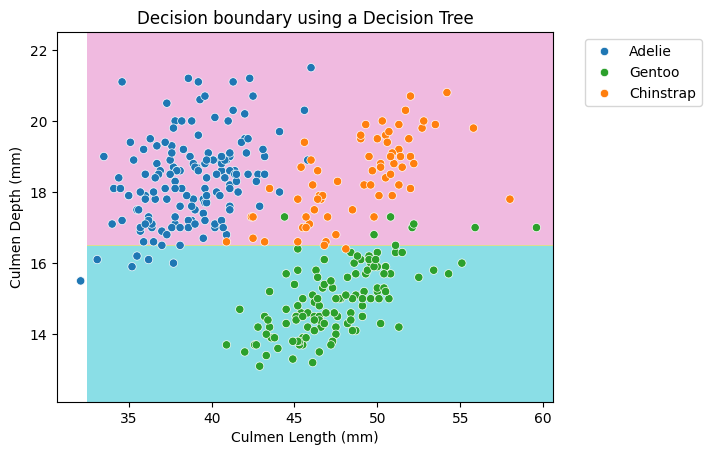

In [68]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)


tree.fit(data_train, target_train)


dbd = DecisionBoundaryDisplay.from_estimator(
                    tree,
                    data_train,
                    response_method="predict",
                    cmap="tab10",
                    norm=tab10_norm,
                    alpha=0.5
)


sns.scatterplot(
            data=df,
            x=culmen_columns[0],
            y=culmen_columns[1],
            hue=target,
            palette=palette
)


# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a Decision Tree")

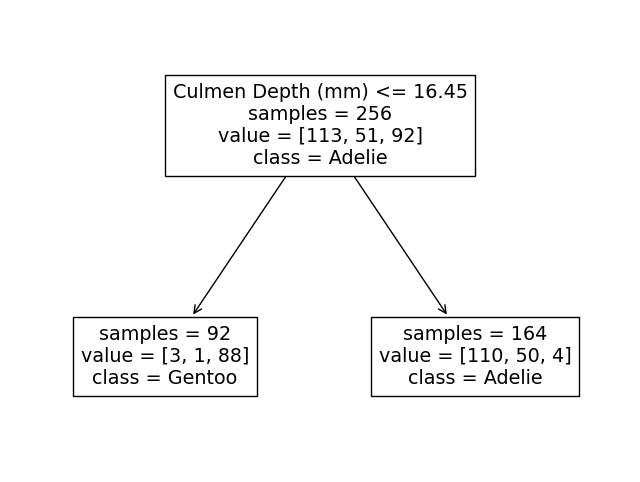

In [69]:
# Visualizing the tree
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8,6))

_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names=tree.classes_.tolist(),
    impurity=False,
    ax=ax
)

We see that the split was done on the **culmen length** feature. The original
dataset was subdivided into 2 sets based on the culmen length (inferior or
superior to 42.3 mm).

This partition of the dataset minimizes the class diversity in each
sub-partitions. This measure is also known as a **criterion**, and is a
settable parameter.

If we look more closely at the partition, we see that the sample superior to
42.3 belongs mainly to the "Gentoo" class. Looking at the values, we indeed
observe 8 "Adelie" individuals in this space. We also count 48 "Chinstrap"
samples and 90 "Gentoo" samples. We can make similar interpretation for the
partition defined by a threshold inferior to 42.3mm. In this case, the most
represented class is the "Adelie" species.

Let's see how our tree would work as a predictor. Let's start with a case
where the culmen depth is inferior to the threshold.

In [70]:
# Prediction Quality


test_penguin_1 = pd.DataFrame(
                {
                    # The discriminatory Column with the criterion
                    "Culmen Length (mm)": [30, 45], 
                    # Column not used in discrimination
                    "Culmen Depth (mm)": [0, 0]
                }
)


tree.predict(test_penguin_1)

array(['Gentoo', 'Gentoo'], dtype=object)

In [71]:
# Predicting Probabilities 

tree.predict_proba(test_penguin_1)[1]

array([0.0326087 , 0.01086957, 0.95652174])

In [72]:
# Test score
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.72


Indeed, it is not a surprise. We saw earlier that a single feature is not able to separate all three species: it underfits. However, from the previous analysis we saw that by using both features we should be able to get fairly good results.g.

## Improving the above

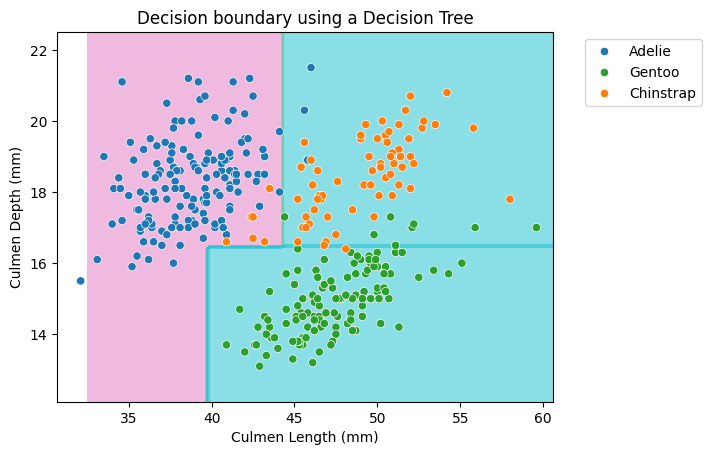

In [73]:
# Working with max_depth = 2

tree = DecisionTreeClassifier(max_depth=2)


tree.fit(data_train, target_train)


dbd = DecisionBoundaryDisplay.from_estimator(
                    tree,
                    data_train,
                    response_method="predict",
                    cmap="tab10",
                    norm=tab10_norm,
                    alpha=0.5
)


sns.scatterplot(
            data=df,
            x=culmen_columns[0],
            y=culmen_columns[1],
            hue=target,
            palette=palette
)


# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a Decision Tree")

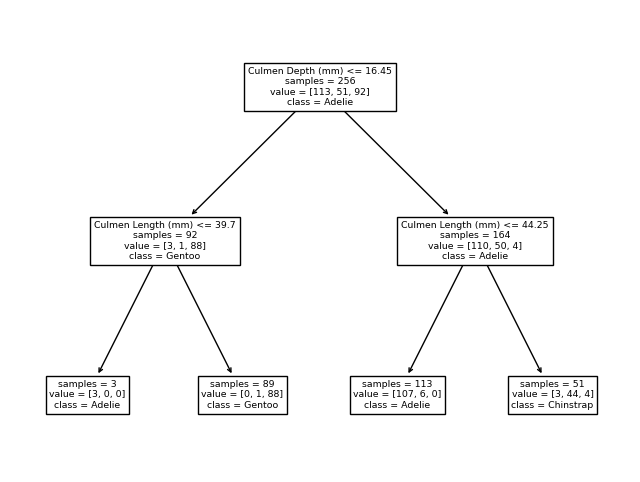

In [74]:

_, ax = plt.subplots(figsize=(8,6))

_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names=tree.classes_.tolist(),
    impurity=False,
    ax=ax
)

In [75]:
# Test score
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.95


> The random_state of training-test split massively affects the the accuracy of models. Please se CV always.

# Decision Tree for Regression

In [76]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_regression.csv"

df = pd.read_csv(df_path)


feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"

data_train, target_train = df[[feature_name]], df[target_name]

In [77]:
# Synthetic test data

import numpy as np

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)

Using the term "test" here refers to data that was not used for training. It
should not be confused with data coming from a train-test split, as it was
generated in equally-spaced intervals for the visual evaluation of the
predictions.

Note that this is methodologically valid here because our objective is to get
some intuitive understanding on the shape of the decision function of the
learned decision trees.

However, computing an evaluation metric on such a synthetic test set would be
meaningless since the synthetic dataset does not follow the same distribution
as the real world data on which the model would be deployed.

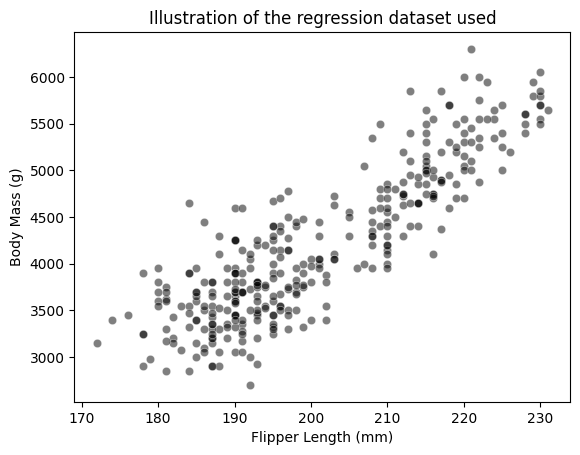

In [84]:
sns.scatterplot(
    data=df,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

_ = plt.title("Illustration of the regression dataset used")

In [85]:
# Fitting a Linear Regression Model

from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()

# Fit the linear model
linear_model.fit(data_train, target_train)


# Prediction
target_pred = linear_model.predict(data_test)

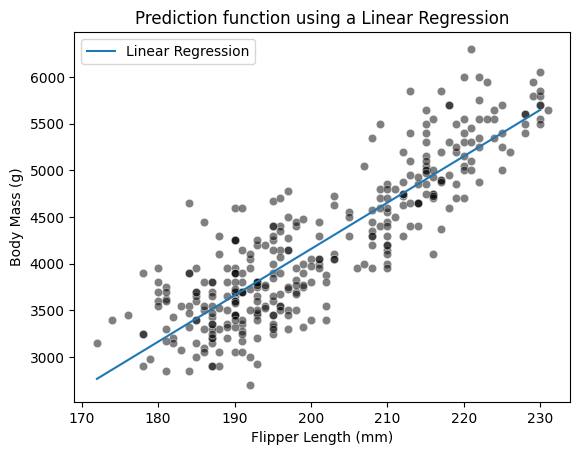

In [87]:
sns.scatterplot(
    data=df,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)


plt.plot(
    data_test[feature_name],
    target_pred,
    label="Linear Regression"
    )


plt.legend()

_ = plt.title("Prediction function using a Linear Regression")

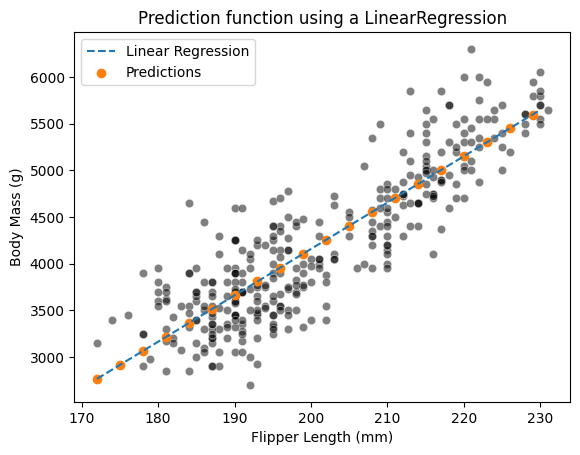

In [88]:
ax = sns.scatterplot(
        data=df,
        x=feature_name,
        y=target_name,
        color="black",
        alpha=0.5
)

# Regression line
plt.plot(
    data_test[feature_name],
    target_pred,
    label="Linear Regression",
    linestyle="--"
)

# Predictions
plt.scatter(
    data_test[::3],
    target_pred[::3],
    label="Predictions",
    color="tab:orange"
)


plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

> Contrary to linear models, decision trees are non-parametric models: they do not make assumptions about the way data is distributed. This affects the prediction scheme. Repeating the above experiment highlights the differences.

In [89]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the Dec Tree Regressor
tree = DecisionTreeRegressor(max_depth=1)

# Fit the tree
tree.fit(data_train, target_train)

# Predict the test data
target_predicted = tree.predict(data_test)

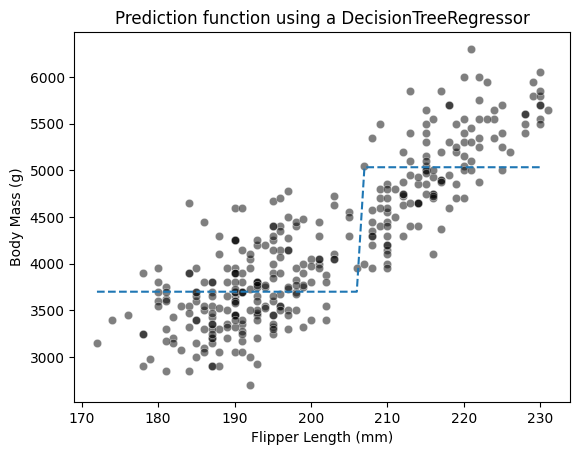

In [90]:
ax = sns.scatterplot(
        data=df,
        x=feature_name,
        y=target_name,
        color="black",
        alpha=0.5
)

# Regression line
plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Decision Tree Regression",
    linestyle="--"
)

_ = plt.title("Prediction function using a DecisionTreeRegressor")

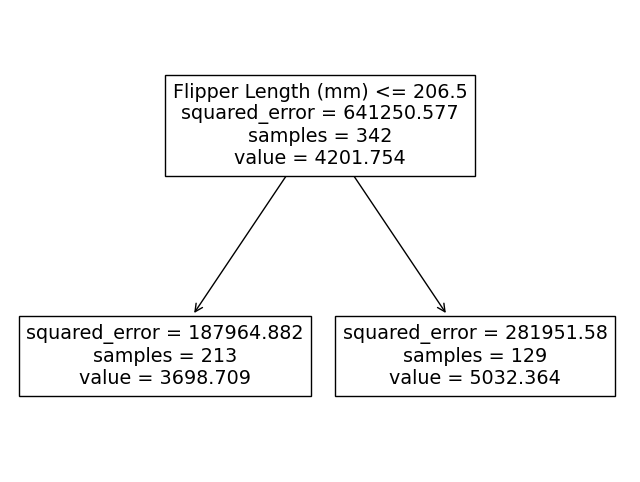

In [91]:
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=[feature_name], ax=ax)

In [92]:
# Improvinf the tree with max_Depth

# Max depth=3
tree = DecisionTreeRegressor(max_depth=3)

# fit to train
tree.fit(data_train, target_train)

# Predict
target_predicted = tree.predict(data_test)

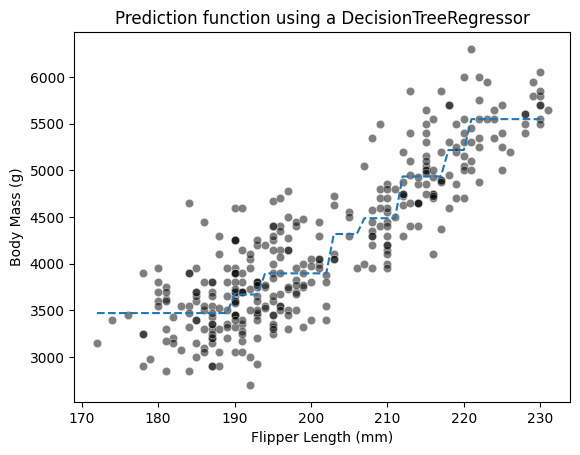

In [93]:
ax = sns.scatterplot(
        data=df,
        x=feature_name,
        y=target_name,
        color="black",
        alpha=0.5
)

# Regression line
plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Decision Tree Regression",
    linestyle="--"
)

_ = plt.title("Prediction function using a DecisionTreeRegressor")

# Importance of Decision Tree Hyperparameters on Generalization

In [94]:
# Data for Classification

data_clf_cols =  ["Culmen Length (mm)", "Culmen Depth (mm)"]

target_clf_col = "Species"

clf_df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_classification.csv"

df_clf = pd.read_csv(clf_df_path)

In [95]:
# Data for regression
data_reg_cols =  ["Flipper Length (mm)"]

target_reg_col = "Body Mass (g)"

reg_df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_regression.csv"


reg_df = pd.read_csv(reg_df_path)


## Helper Functions

In [107]:
def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique == 2:
        palette = ["tab:red", "tab:blue"]

    else:
        palette = ["tab:red", "tab:blue", "black"]

    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:,0].max()),
        columns=data[feature_names].columns
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x = data.iloc[:,0],
        y = data[target_names],
        color = "black",
        alpha = 0.05
    )
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

### Effect of the *max_depth* parameter 

In [116]:
max_depth = 2

tree_clf = DecisionTreeClassifier(max_depth = max_depth)
tree_reg = DecisionTreeRegressor(max_depth = max_depth)

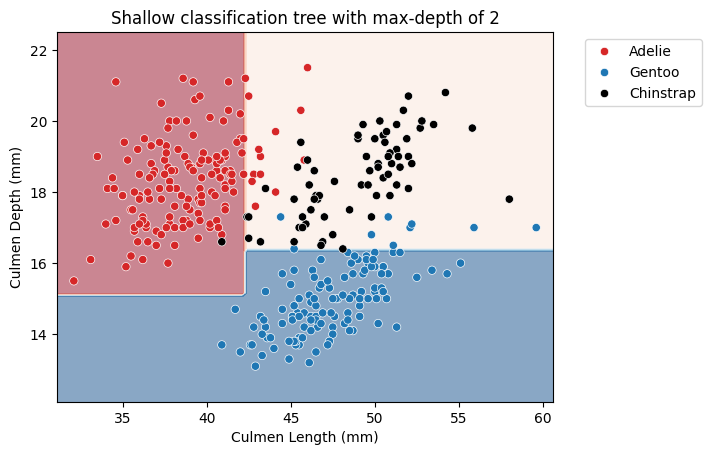

In [117]:
# Fitting the classification model

fit_and_plot_classification(
    tree_clf,
    df_clf,
    data_clf_cols,
    target_clf_col
)

_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

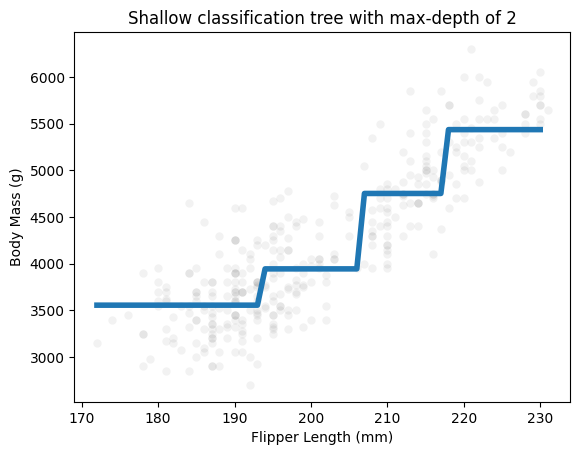

In [119]:
# Fitting the regression model

fit_and_plot_regression(
    tree_reg,
    reg_df,
    data_reg_cols,
    target_reg_col
)

_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

In [111]:
max_depth = 30

tree_clf = DecisionTreeClassifier(max_depth = max_depth)
tree_reg = DecisionTreeRegressor(max_depth = max_depth)

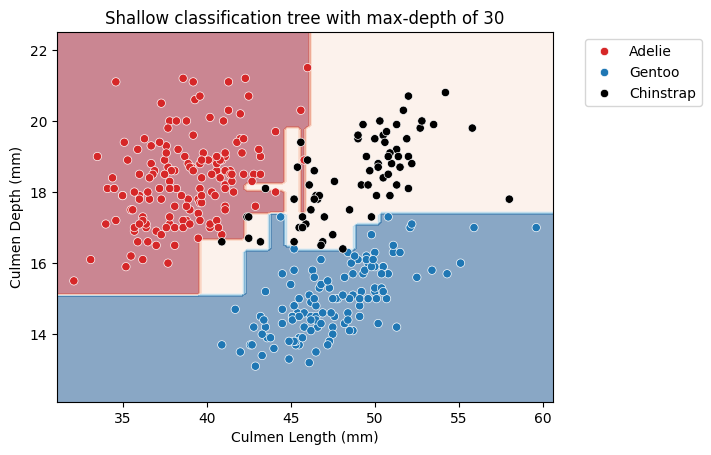

In [114]:
# Fitting the classification model

fit_and_plot_classification(
    tree_clf,
    df_clf,
    data_clf_cols,
    target_clf_col
)

_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

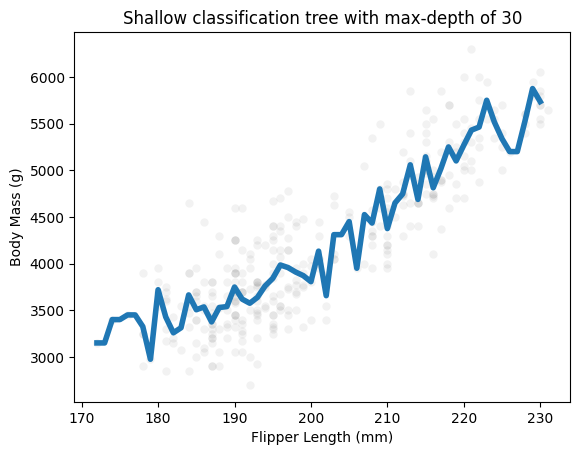

In [115]:
# Fitting the regression model

fit_and_plot_regression(
    tree_reg,
    reg_df,
    data_reg_cols,
    target_reg_col
)

_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

For both classification and regression setting, we observe that increasing the
depth makes the tree model more expressive. However, a tree that is too deep
may overfit the training data, creating partitions which are only correct for
"outliers" (noisy samples). The `max_depth` is one of the hyperparameters that
one should optimize via cross-validation and grid-search.

In [129]:
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": np.arange(2, 10, 1)}


tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid,cv=10)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=10)

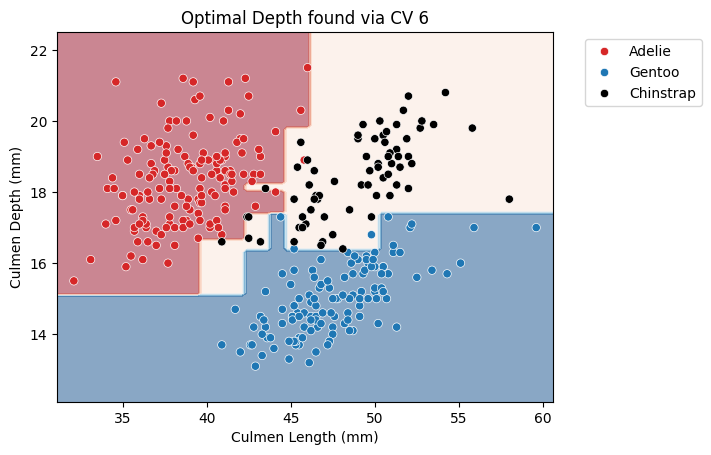

In [130]:
# Fitting the classification model

fit_and_plot_classification(
    tree_clf,
    df_clf,
    data_clf_cols,
    target_clf_col
)

_ = plt.title(f'Optimal Depth found via CV {tree_clf.best_params_["max_depth"]}')

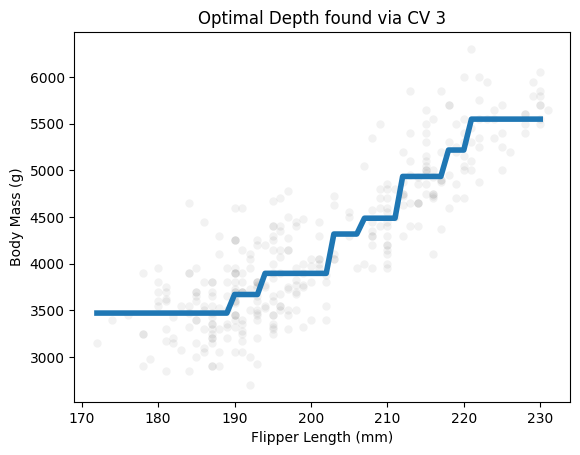

In [133]:
# Fitting the regression model

fit_and_plot_regression(
    tree_reg,
    reg_df,
    data_reg_cols,
    target_reg_col
)

_ = plt.title(f'Optimal Depth found via CV {tree_reg.best_params_["max_depth"]}')

### Other Hyperparameters in Decision Trees

The `max_depth` hyperparameter controls the overall complexity of the tree.
This parameter is adequate under the assumption that a tree is built
symmetrically. However, there is no reason why a tree should be symmetrical.
Indeed, optimal generalization performance could be reached by growing some of
the branches deeper than some others.

In [137]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]

target_clf_col = "Class"

# Blobs that are interlaces
X_1, y_1 = make_blobs(
    n_samples=300,
    centers=[[0,0], [-1,-1]],
    random_state=0
)

# Blobs that are interlaces
X_2, y_2 = make_blobs(
    n_samples=300,
    centers=[[3,6], [7,0]],
    random_state=0
)


X = np.concatenate([X_1,X_2], axis=0)
y = np.concatenate([y_1, y_2])


data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)

data_clf = pd.DataFrame(
    data_clf,
    columns=data_clf_columns + [target_clf_col]
)

data_clf[target_clf_col] = data_clf[target_clf_col].astype(np.int32)

In [138]:
data_clf.head()

,Feature #0,Feature #1,Class
0,0.950088,-0.151357,0
1,1.955912,0.390093,0
2,-1.353432,-2.616474,1
3,-0.455533,0.017479,0
4,0.465662,-1.536244,0


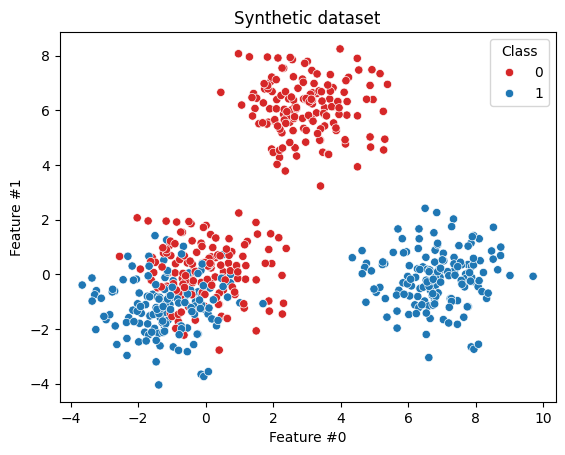

In [142]:
sns.scatterplot(
    data=data_clf,
    x=data_clf_columns[0],
    y=data_clf_columns[1],
    hue=target_clf_col,
    palette=["tab:red", "tab:blue"]
)

_ = plt.title("Synthetic dataset")

C:\Users\marvi\AppData\Local\Temp\ipykernel_33332\882511417.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


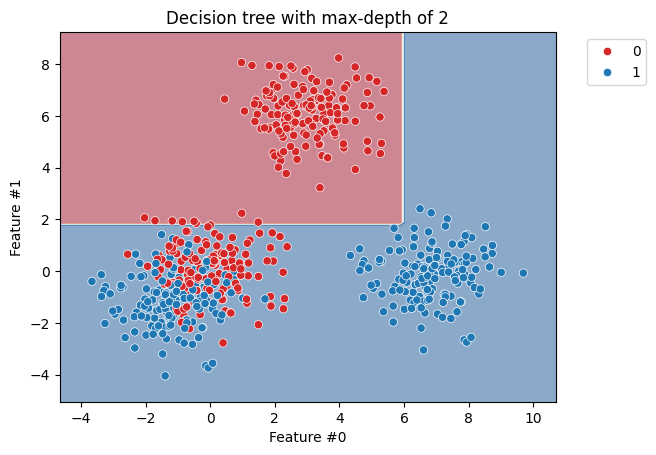

In [143]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_col
)

_ = plt.title(f"Decision tree with max-depth of {max_depth}")

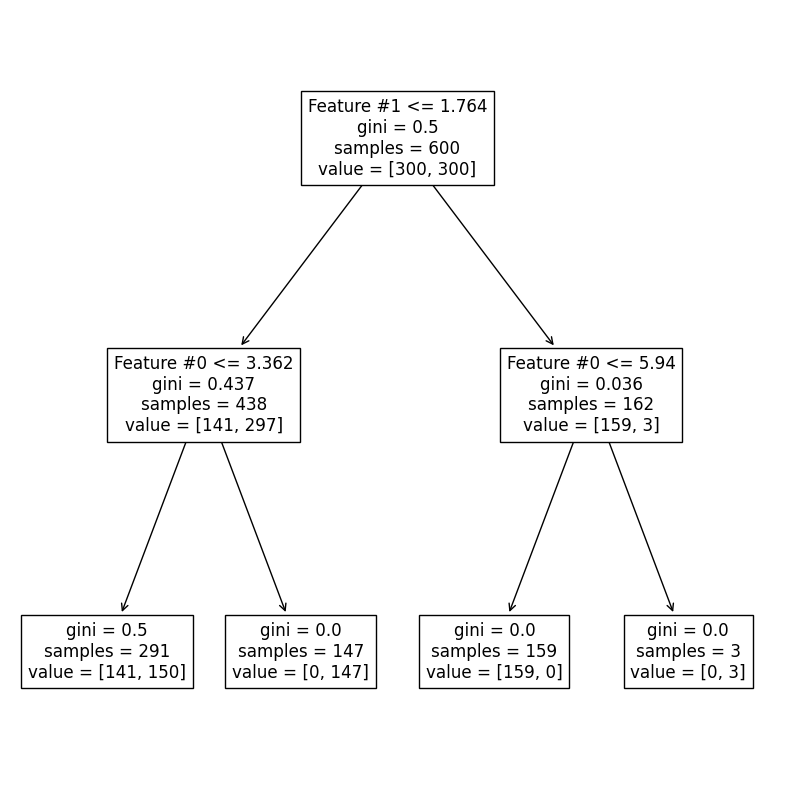

In [144]:
_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

C:\Users\marvi\AppData\Local\Temp\ipykernel_33332\882511417.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


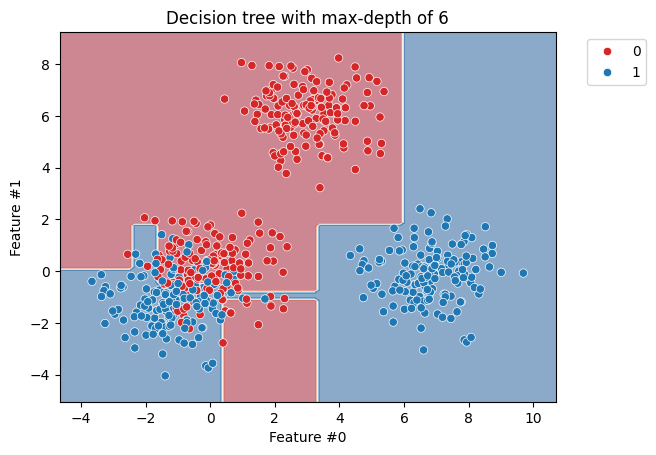

In [145]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_col
)

_ = plt.title(f"Decision tree with max-depth of {max_depth}")

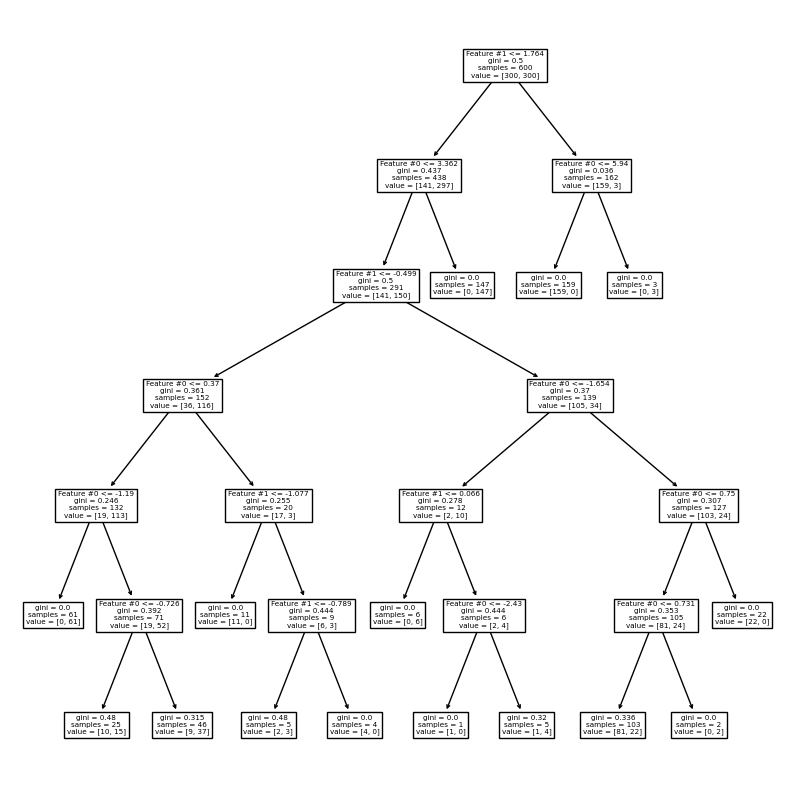

In [146]:
_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

The hyperparameters `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`,
or `min_impurity_decrease` allow growing asymmetric trees and apply a
constraint at the leaves or nodes level. We check the effect of
`min_samples_leaf`.

C:\Users\marvi\AppData\Local\Temp\ipykernel_33332\882511417.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


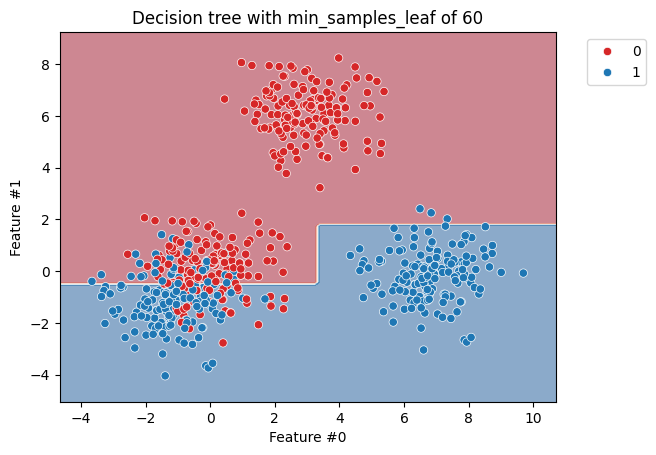

In [148]:
min_samples_leaf = 60

tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)

fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_col
)

_ = plt.title(f"Decision tree with min_samples_leaf of {min_samples_leaf}")

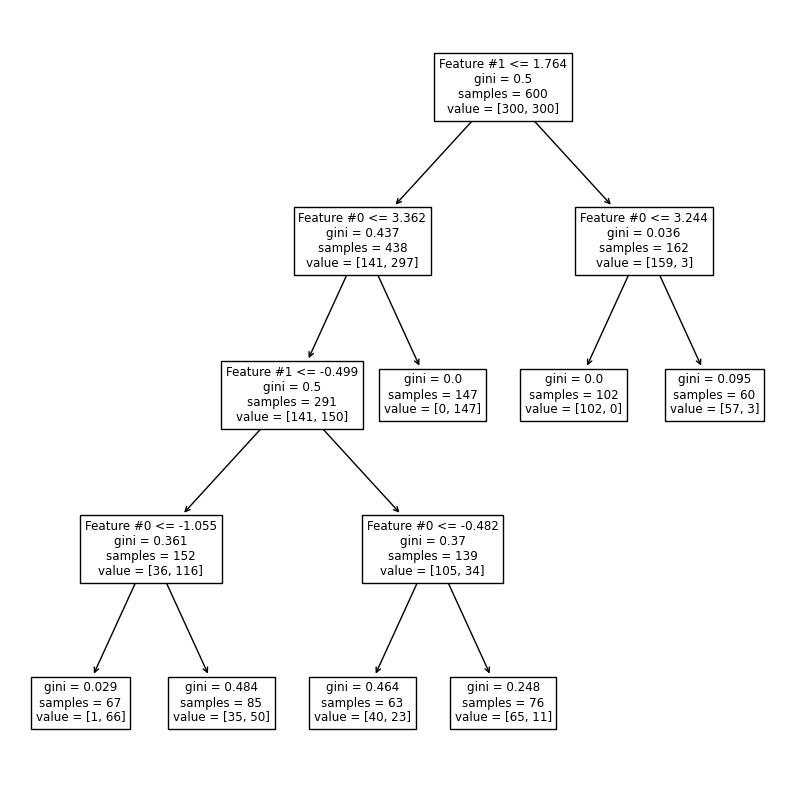

In [149]:
_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

This hyperparameter allows to have leaves with a minimum number of samples and
no further splits are searched otherwise. Therefore, these hyperparameters
could be an alternative to fix the `max_depth` hyperparameter.

# Housing Project 

In [285]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv"


df = pd.read_csv(df_path, na_filter=False)

target_name = "SalePrice"

data = df.drop(columns=target_name)

target = df[target_name]

In [286]:
# Features of interest
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]


data_numerical = df[numerical_features]

In [287]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# Linear Model
lin_reg = make_pipeline(
    StandardScaler(),
    LinearRegression()
).set_output(transform="pandas") 

# Creating cross_validation

reg_cv_results = cross_validate(
                    lin_reg,
                    data_numerical,
                    target,
                    return_estimator=True,
                    # scoring="neg_mean_squared_error",
                    cv=10
)


reg_cv_results = pd.DataFrame(reg_cv_results)

In [288]:
reg_cv_results

,fit_time,score_time,estimator,test_score
0,0.013006,0.004992,"(StandardScaler(), LinearRegression())",0.761300
1,0.009247,0.004885,"(StandardScaler(), LinearRegression())",0.806351
2,0.010554,0.003859,"(StandardScaler(), LinearRegression())",0.811890
3,0.013257,0.002855,"(StandardScaler(), LinearRegression())",0.665922
4,0.009665,0.003791,"(StandardScaler(), LinearRegression())",0.796035
5,0.008604,0.003516,"(StandardScaler(), LinearRegression())",0.768688
6,0.010560,0.004244,"(StandardScaler(), LinearRegression())",0.756351
7,0.013142,0.004438,"(StandardScaler(), LinearRegression())",0.718221
8,0.011961,0.004101,"(StandardScaler(), LinearRegression())",0.314793
9,0.009900,0.003997,"(StandardScaler(), LinearRegression())",0.786352


In [289]:
# Instantiate the tree regressor
tree_reg = DecisionTreeRegressor(random_state=0)


# Creating cross_validation
tree_cv_results = cross_validate(
                    tree_reg,
                    data_numerical,
                    target,
                    return_estimator=True,
                    # scoring="neg_mean_squared_error",
                    cv=10
)


tree_cv_results = pd.DataFrame(tree_cv_results)

In [290]:
tree_cv_results

,fit_time,score_time,estimator,test_score
0,0.058987,0.001998,DecisionTreeRegressor(random_state=0),0.616133
1,0.049340,0.002084,DecisionTreeRegressor(random_state=0),0.694938
2,0.061789,0.004084,DecisionTreeRegressor(random_state=0),0.708705
3,0.052254,0.002996,DecisionTreeRegressor(random_state=0),0.611724
4,0.053922,0.003004,DecisionTreeRegressor(random_state=0),0.709721
5,0.048908,0.003470,DecisionTreeRegressor(random_state=0),0.620982
6,0.071608,0.004247,DecisionTreeRegressor(random_state=0),0.511159
7,0.056501,0.003001,DecisionTreeRegressor(random_state=0),0.629689
8,0.060509,0.004154,DecisionTreeRegressor(random_state=0),0.423244
9,0.054190,0.002236,DecisionTreeRegressor(random_state=0),0.683963


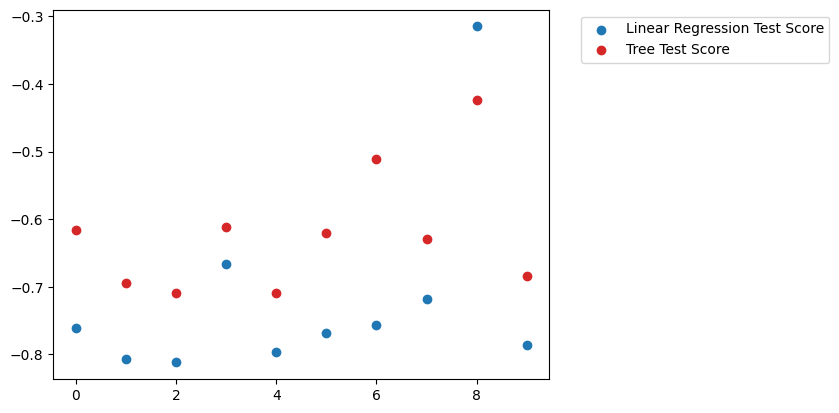

In [291]:
# Comparing the results

lin_reg_test_score = (reg_cv_results["test_score"] * -1)

tree_test_score = (tree_cv_results["test_score"] * -1)

plt.scatter(
    lin_reg_test_score.index, 
    lin_reg_test_score, 
    color="tab:blue", 
    label="Linear Regression Test Score"
)


plt.scatter(
    tree_test_score.index,
    tree_test_score,
    color="tab:red",
    label="Tree Test Score",
)

_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


## Tuning the Decision Tree - Nested Cross-Validation

In [292]:
# Inner Tuning of Parameter
max_depth = np.arange(1, 16, 1)

param_grid = {
    "max_depth": max_depth
}

tree_reg_tuned = GridSearchCV(
    DecisionTreeRegressor(random_state=0), 
    param_grid=param_grid,
    # Mention cv
    cv=10
)


# Outer Tuning with Cross Val
tree_tuned_cv_results = cross_validate(
                            tree_reg_tuned,
                            data_numerical,
                            target,
                            return_estimator=True,
                            # scoring="neg_mean_squared_error",
                            cv=10
)

# Cast Score to DF
tree_tuned_cv_results = pd.DataFrame(tree_tuned_cv_results)

In [293]:
tree_tuned_cv_results

,fit_time,score_time,estimator,test_score
0,3.480583,0.002000,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.623642
1,3.821193,0.002000,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.750079
2,3.781287,0.003008,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.709294
3,4.127949,0.003535,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.615938
4,4.024199,0.002001,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.760087
5,4.135553,0.003000,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.724811
6,4.210376,0.003027,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.696755
7,3.990479,0.002004,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.725213
8,4.040240,0.002000,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.631877
9,3.821016,0.003007,"GridSearchCV(cv=10, estimator=DecisionTreeRegr...",0.728665


In [294]:
tree_tuned_cv_results["test_score"].mean()

0.6966361061945607

In [295]:
# Extracting the tuned max_depth
max_depth_list = [est.best_params_["max_depth"] for est in tree_tuned_cv_results["estimator"]]


max_depth_list

[5, 7, 6, 6, 8, 6, 7, 8, 7, 6]

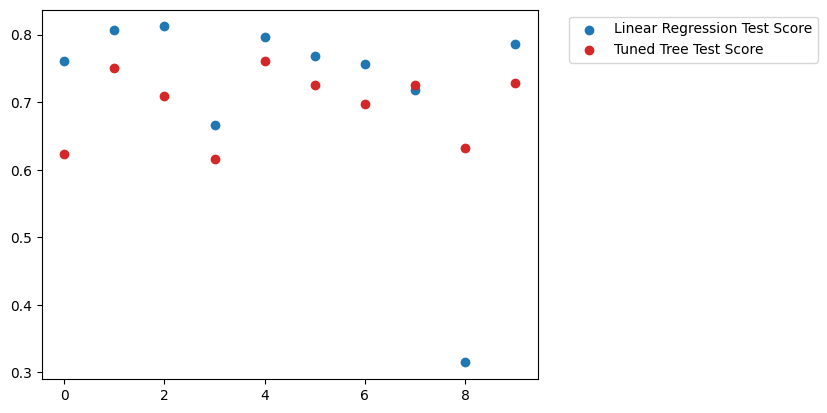

In [296]:
# Viewing the results
tree_tuned_score = (tree_tuned_cv_results["test_score"])

lin_reg_test_score = (reg_cv_results["test_score"])

plt.scatter(
    lin_reg_test_score.index, 
    lin_reg_test_score, 
    color="tab:blue", 
    label="Linear Regression Test Score"
)


plt.scatter(
    tree_tuned_score.index,
    tree_tuned_score,
    color="tab:red",
    label="Tuned Tree Test Score",
);


_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

In [297]:
from sklearn.compose import make_column_transformer, make_column_selector 
from sklearn.preprocessing import OrdinalEncoder


categorical_features = make_column_selector(dtype_include=object)

data_categorical = df[categorical_features]

df_pre_processor = make_column_transformer(
                    # Processing the Categorical Variables
                    (
                        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), 
                        categorical_features,
                    ),
                    # Processing the Numerical Variables
                    (
                        "passthrough", 
                        numerical_features,
                    )
)



# Decision Tree pipeline
tree_tuned_pipeline = make_pipeline(
                                # Preprocessor
                                df_pre_processor,
                                # Model
                                DecisionTreeRegressor(max_depth=7, random_state=0)
)


# Tuning with Cross Val
tree_tuned_cv_results_num_cat = cross_validate(
                                    tree_tuned_pipeline,
                                    # full data
                                    data,
                                    target,
                                    return_estimator=True,
                                    # scoring="neg_mean_squared_error",
                                    cv=10,
                                    n_jobs=2
)

# Cast Score to DF
tree_tuned_cv_results_num_cat = pd.DataFrame(tree_tuned_cv_results_num_cat)

In [298]:
tree_tuned_cv_results_num_cat["test_score"].mean()

0.7383564466540788

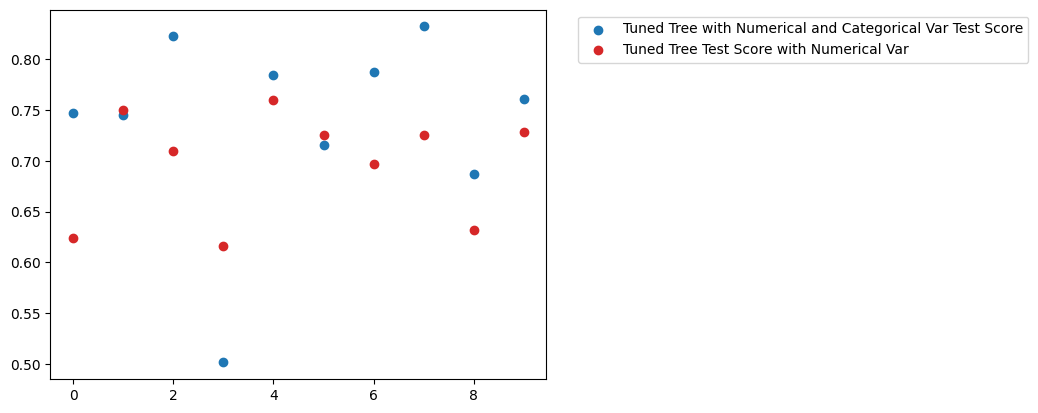

In [301]:
# Viewing the results
tree_tuned_score = (tree_tuned_cv_results["test_score"])

tree_tuned_score_num_cat = (tree_tuned_cv_results_num_cat["test_score"])


plt.scatter(
    tree_tuned_score_num_cat.index, 
    tree_tuned_score_num_cat, 
    color="tab:blue", 
    label="Tuned Tree with Numerical and Categorical Var Test Score"
)


plt.scatter(
    tree_tuned_score.index,
    tree_tuned_score,
    color="tab:red",
    label="Tuned Tree Test Score with Numerical Var",
);


_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

In [322]:
df_path = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv"


df_false = pd.read_csv(df_path, na_filter=False)

In [323]:
df_true = pd.read_csv(df_path, na_filter=True)


In [329]:
(
    df_false
     .eq(df_true)
     .all()
     .sort_values()
)

MasVnrType     False
MSSubClass      True
FireplaceQu     True
Fireplaces      True
Functional      True
               ...  
Exterior2nd     True
Exterior1st     True
RoofMatl        True
BsmtQual        True
SalePrice       True
Length: 80, dtype: bool

In [330]:
df_false["MasVnrType"]

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [332]:
df_true["MasVnrType"]

0       BrkFace
1           NaN
2       BrkFace
3           NaN
4       BrkFace
         ...   
1455        NaN
1456      Stone
1457        NaN
1458        NaN
1459        NaN
Name: MasVnrType, Length: 1460, dtype: object